## Holt Exponential Smoothing

The Holt Exponential Smoothing technique fixes one of the two shortcomings of the simple Exponential Smoothing technique. 
Holt Exponential Smoothing can be used o forecast time series data that has a trend. But Holt Exponential Smoothing fails in the presence of seasonal variations in the time series.

## Holt-Winters Exponential Smoothing

The **Holt-Winters Exponential Smoothing** modifies the Holt ES technique so that it can be used in the presence of both trend and seasonality.

### Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Importing the Required Libraries from Functions

In [3]:
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as Exps

### Reading the Data

In [4]:
car_sales = pd.read_csv('Retail Sales of cars.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
car_sales

,Retail_Sales
DATE,
1992-01-01,1744
1992-01-02,1990
1992-01-03,2177
1992-01-04,2601
1992-01-05,2171
...,...
2019-01-12,8669
2020-01-01,8971
2020-01-02,10567


### Plotting the data

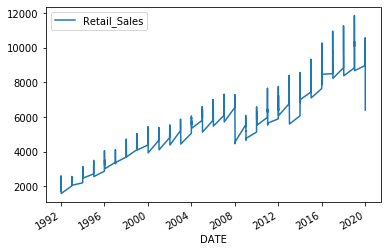

In [5]:
car_sales.plot()
plt.show()

### Splitting the data into Training data and Test Data

In [6]:
#The last 12 periods form the test data
car_sales_train = car_sales.iloc[:-12]
car_sales_test = car_sales.iloc[-12:]

# Holt-Winters Exponential or Triple Exponential Smoothing

### Building and Training the model on the Training data

In the above chart, the level of the time series seems to be increasing linearly. So we set the trend as additive. However, the seasonal variation around each level seems to be increasing in proportion to the current level. So we set the seasonality to multiplicative.

In [7]:
model = Exps(car_sales_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### Printing the training summary

In [8]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  328
Model:             ExponentialSmoothing   SSE                       23246801.149
Optimized:                         True   AIC                           3695.322
Trend:                         Additive   BIC                           3756.010
Seasonal:                Multiplicative   AICC                          3697.536
Seasonal Periods:                    12   Date:                 Fri, 18 Jun 2021
Box-Cox:                          False   Time:                         15:48:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3891108                alpha                 True
smoothing_slope          

## Forecasting the data

Here we are creating an out of sample forecast for the next 12 steps beyond the final data point in the training data set.

In [9]:
sales_forecast = fitted.forecast(steps=12)
sales_forecast

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


328    10354.784316
329    10127.111172
330     9977.745899
331    10207.295749
332     9313.286776
333     9478.686463
334     8835.631054
335     8635.703173
336     9116.892408
337    10500.092468
338    12239.429446
339    10380.545358
dtype: float64

### Plotting all the training data, test data and forecast 

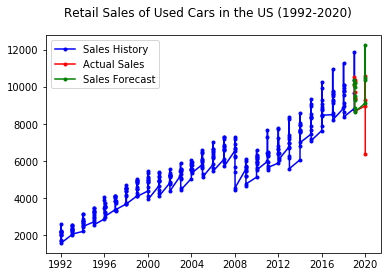

In [18]:
# plot the training data, the test data and the forecast on the same plot
fig = plt.figure()
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(car_sales_train.index, car_sales_train, 'b.-', label='Sales History')
future, = plt.plot(car_sales_test.index, car_sales_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(car_sales_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

**Here, we can see that the forecast lags behind sharp turning points as it rightly should for any moving average based forecasting technique**

# Double Exponential Smoothing

In [15]:
model = Exps(np.asarray(car_sales_train['Retail_Sales']), trend='add', seasonal=None)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.7, optimized=False)

### Forecasting the Data 

In [17]:
sales_forecasting = fit1.forecast(len(car_sales_test))
sales_forecasting

array([11718.20201392, 12542.53372847, 13366.86544301, 14191.19715755,
       15015.5288721 , 15839.86058664, 16664.19230118, 17488.52401573,
       18312.85573027, 19137.18744481, 19961.51915935, 20785.8508739 ])

### Plotting all the training data, test data and forecast 

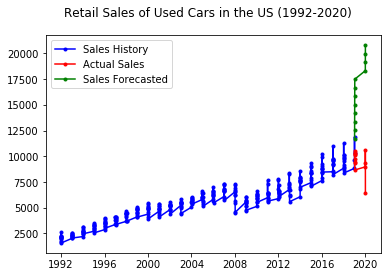

In [21]:
# plot the training data, the test data and the forecast on the same plot
fig = plt.figure()
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(car_sales_train.index, car_sales_train, 'b.-', label='Sales History')
future, = plt.plot(car_sales_test.index, car_sales_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(car_sales_test.index, sales_forecasting, 'g.-', label='Sales Forecasted')
plt.legend(handles=[past, future, predicted_future])
plt.show()